In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import gc
from scipy.interpolate import griddata
import scipy.io as sio
import scipy.interpolate as si
import scipy.integrate as sint

import full_expression_PSD as full
import modular_PSD as mod
import extended_PSD as ext

sns.set(style='ticks', palette="Set2")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
# gTurbColor = '#7DCFB6'
# gImpColor = '#FBD1A2'

# fTurbColor = '#00B2CA'
# fImpColor = '#F79256'

gTurbColor = '#8DA1B9' #'lightsteelblue'
fTurbColor = '#3D348B'

gImpColor = 'gold'
fImpColor = '#F18701'

# gTurbColor = '#7678ED'
# fTurbColor = '#3D348B'

# gImpColor = '#F7B801'
# fImpColor = '#F18701'

In [3]:
pavlof_t1 = np.loadtxt('/Users/kcoppess/muspelheim/gestrich-model/pavlofData_t1_median_PSD.txt', skiprows=1)
pavlof_t2 = np.loadtxt('/Users/kcoppess/muspelheim/gestrich-model/pavlofData_t2_median_PSD.txt', skiprows=1)

In [4]:
freq = np.linspace(0.8, 5, 1000)

impactsPSD_mod = mod.impact_PSD(freq) #/ 5.805 * 0.088
impactsPSD_mod_dB = 10 * np.log10(impactsPSD_mod)

impactsPSD_mod_min = mod.impact_PSD(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD_mod_min_dB = 10 * np.log10(impactsPSD_mod_min)

impactsPSD_mod_max = mod.impact_PSD(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD_mod_max_dB = 10 * np.log10(impactsPSD_mod_max)



turbulencePSD_mod = mod.turbulence_PSD(freq) #/ 0.00113243 * 5.8e-4
turbulencePSD_mod_dB = 10 * np.log10(turbulencePSD_mod)

turbulencePSD_mod_min = mod.turbulence_PSD(freq, u_mean=40, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD_mod_min_dB = 10 * np.log10(turbulencePSD_mod_min)

turbulencePSD_mod_max = mod.turbulence_PSD(freq, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_mod_max_dB = 10 * np.log10(turbulencePSD_mod_max)

<IPython.core.display.Javascript object>


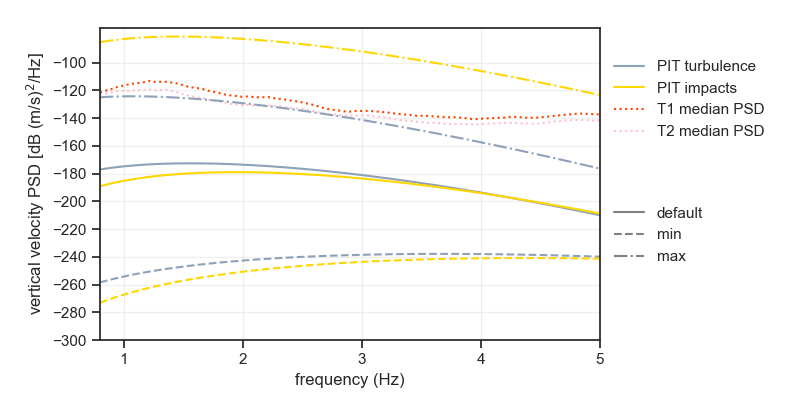

In [5]:
%matplotlib notebook

ax = plt.figure(figsize=(8,4))

legend_elements = [Line2D([0], [0], color=gTurbColor, linestyle='-', label='PIT turbulence'), 
                   Line2D([0], [0], color=gImpColor, linestyle='-', label='PIT impacts',),
                   Line2D([0], [0], color='orangered', linestyle=':', label='T1 median PSD',),
                   Line2D([0], [0], color='pink', linestyle=':', label='T2 median PSD',)]
leg = plt.legend(handles=legend_elements, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.6), loc='lower left')

legend_elements1 = [Line2D([0], [0], color='gray', linestyle='-', label='default'), 
                   Line2D([0], [0], color='gray', linestyle='--', label='min'),
                   Line2D([0], [0], color='gray', linestyle='-.', label='max')]
leg1 = plt.legend(handles=legend_elements1, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.2), loc='lower left')

ax.add_artist(leg)

plt.plot(pavlof_t1[:,0], 10*np.log10(pavlof_t1[:,1]), linestyle=':', color='orangered')
plt.plot(pavlof_t2[:,0], 10*np.log10(pavlof_t2[:,1]), linestyle=':', color='pink')

plt.plot(freq, turbulencePSD_mod_dB, color=gTurbColor, label='turbulence')
plt.plot(freq, turbulencePSD_mod_min_dB, color=gTurbColor, linestyle='--')
plt.plot(freq, turbulencePSD_mod_max_dB, color=gTurbColor, linestyle='-.')

plt.plot(freq, impactsPSD_mod_dB, color=gImpColor, label='impacts')
plt.plot(freq, impactsPSD_mod_min_dB, color=gImpColor, linestyle='--')
plt.plot(freq, impactsPSD_mod_max_dB, color=gImpColor, linestyle='-.')

plt.grid(alpha=0.3)
plt.subplots_adjust(top=0.93, right=0.75, bottom=0.15)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
# plt.legend()
# plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/gestrich-PSD-fig10-recreation.png', dpi=300)
plt.show()

In [6]:
STEPdirectory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric3535m_BooreJoyner_conduit/extended_6km_sf/10km/'
STEPll = 10
STEPdepths = np.linspace(160, 150, STEPll)

STEPf, STEPgf_hat, STEPgf_time = ext.load_gfs_ES(STEPdirectory, STEPdepths, RETURNTIME=True)

In [7]:
source_time = STEPgf_time.copy()
dt = 0.04
tt = len(source_time)

sig = 0.15
time_shift = 8 * sig
force_rate = np.exp(-((source_time - time_shift)/ sig) **2 / 2) / (np.sqrt(2 * np.pi) * sig)

omega = np.fft.fftfreq(tt, dt) * (2 * np.pi)

force_rate_hat = np.fft.fft(force_rate) * dt
force_rate_hat *= np.exp(1j * omega * time_shift) # shifting to have centered at t=0
force = sint.cumtrapz(force_rate, x=source_time, initial=0)

<IPython.core.display.Javascript object>


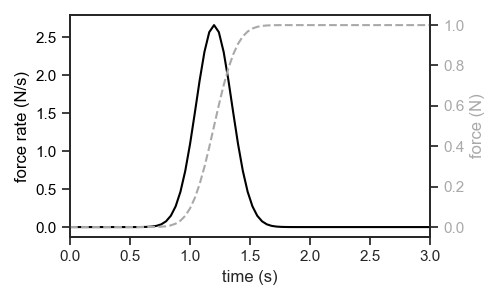

In [8]:
%matplotlib notebook

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('force rate (N/s)', color=color)
ax1.plot(source_time, force_rate, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 3)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkgrey'
ax2.set_ylabel('force (N)', color=color)  # we already handled the x-label with ax1
ax2.plot(source_time, force, '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/step-source.png', dpi=300)
plt.show()

In [9]:
fullGF_hat = force_rate_hat[:int(tt/2)] * STEPgf_hat[1][-1,:,0]
RWGF_hat = force_rate_hat[:int(tt/2)] * mod.Rayleigh_greens_function_vertical(STEPf, rho_s=2700, rx=10000, Q=30)[2]

N = len(STEPf)*2 # number of Fourier sample points
h = 0.04 # grid spacing, nominally h=0.1 km for r=1
L = N*h # profile length

PSDfullGF = np.abs(fullGF_hat)**2/L
PSDRWGF = np.abs(RWGF_hat)**2/L

PSDfullGF_dB = 10 * np.log10(PSDfullGF)
PSDRWGF_dB = 10 * np.log10(PSDRWGF)

/Users/kcoppess/muspelheim/gestrich-model/full_expression_PSD.py:19: RuntimeWarning: divide by zero encountered in power
  vc = vc0 * (f / f0) ** (-xi)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:31: RuntimeWarning: divide by zero encountered in true_divide
  gf_fac *= np.sqrt(2 / (np.pi * k * rx))
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:31: RuntimeWarning: invalid value encountered in multiply
  gf_fac *= np.sqrt(2 / (np.pi * k * rx))


<IPython.core.display.Javascript object>


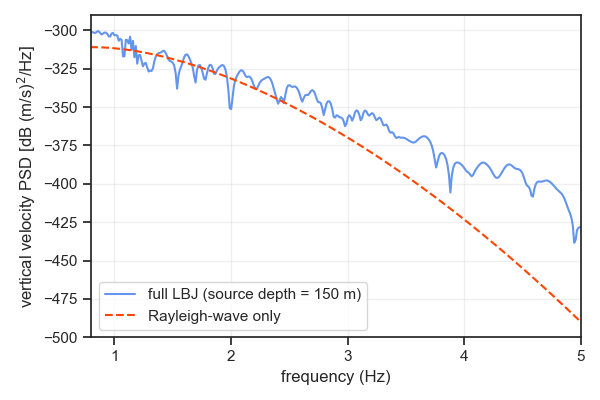

In [10]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(STEPf, PSDfullGF_dB, color='cornflowerblue', label='full LBJ (source depth = 150 m)')
plt.plot(STEPf, PSDRWGF_dB, color='orangered', linestyle='--', label='Rayleigh-wave only')

plt.grid(alpha=0.3)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-500, -290)
plt.xlim(0.8, 5)
plt.legend(loc=3)
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/fullGF-rayleighGF-PSD-comparision.png', dpi=300)
plt.show()

In [11]:
directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric3535m_BooreJoyner_conduit/extended_6km_sf/10km/'
ll = 1000
depths = np.linspace(1150, 150, ll)
DZ = abs(depths[0] - depths[1])

f, gf_hat, gf_time = ext.load_gfs_ES(directory, depths, RETURNTIME=True)

In [12]:
'''Gestrich default input values w/ no depth variation'''
Dr = 1.4e-3 * np.ones(ll)
Db = 0.5 * np.ones(ll)
u_mean = 120 * np.ones(ll)
phi_p = 0.1 * np.ones(ll)
rho_g = 0.5 * np.ones(ll)

num_imp = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr, phi_p, dz = DZ)
num_imp_integrated = np.sum(num_imp, axis=0)
num_imp_dB = 10 * np.log10(num_imp_integrated)

num_turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean, Db, rho_g, dz = DZ)
num_turb_integrated = np.sum(num_turb, axis=0)
num_turb_dB = 10 * np.log10(num_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/765572482.py:10: RuntimeWarning: divide by zero encountered in log10
  num_imp_dB = 10 * np.log10(num_imp_integrated)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:238: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (np.sqrt(2) * gfs[0][:,:,0] + gfs[1][:,:,0])**2
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:241: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * np.abs(FGjz2)


In [13]:
# impactsPSD_mod_min = mod.impact_PSD(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
#                           df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
# impactsPSD_mod_min_dB = 10 * np.log10(impactsPSD_mod_min)


# turbulencePSD_mod_min = mod.turbulence_PSD(freq, u_mean=40, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
#                               df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
# turbulencePSD_mod_min_dB = 10 * np.log10(turbulencePSD_mod_min)


'''Gestrich min input values w/ no depth variation'''
min_Dr = 6.25e-5 * np.ones(ll)
min_Db = 0.01 * np.ones(ll)
min_u_mean = 40 * np.ones(ll)
min_phi_p = 0.01 * np.ones(ll)
min_rho_g = 0.05 * np.ones(ll)

num_imp_min = ext.impact_PSD_ES_numGF(f, depths, gf_hat, min_u_mean, min_Dr, min_phi_p, eb=0.5, R=2, dz = DZ)
num_imp_min_integrated = np.sum(num_imp_min, axis=0)
num_imp_min_dB = 10 * np.log10(num_imp_min_integrated)

num_turb_min = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, min_u_mean, min_Db, min_rho_g, R=2, dz = DZ)
num_turb_min_integrated = np.sum(num_turb_min, axis=0)
num_turb_min_dB = 10 * np.log10(num_turb_min_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/3185757458.py:20: RuntimeWarning: divide by zero encountered in log10
  num_imp_min_dB = 10 * np.log10(num_imp_min_integrated)


In [14]:
# impactsPSD_mod_max = mod.impact_PSD(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
#                           df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
# impactsPSD_mod_max_dB = 10 * np.log10(impactsPSD_mod_max)


# turbulencePSD_mod_max = mod.turbulence_PSD(freq, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
#                               df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
# turbulencePSD_mod_max_dB = 10 * np.log10(turbulencePSD_mod_max)



'''Gestrich max input values w/ no depth variation'''
max_Dr = 0.5 * np.ones(ll)
max_Db = 1.0 * np.ones(ll)
max_u_mean = 300 * np.ones(ll)
max_phi_p = 0.25 * np.ones(ll)
max_rho_g = 5 * np.ones(ll)

num_imp_max = ext.impact_PSD_ES_numGF(f, depths, gf_hat, max_u_mean, max_Dr, max_phi_p, eb=0.99, R=40, dz=DZ)
num_imp_max_integrated = np.sum(num_imp_max, axis=0)
num_imp_max_dB = 10 * np.log10(num_imp_max_integrated)

num_turb_max = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, max_u_mean, max_Db, max_rho_g, R=40, dz=DZ)
num_turb_max_integrated = np.sum(num_turb_max, axis=0)
num_turb_max_dB = 10 * np.log10(num_turb_max_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/2473429485.py:21: RuntimeWarning: divide by zero encountered in log10
  num_imp_max_dB = 10 * np.log10(num_imp_max_integrated)


In [15]:
freq = np.linspace(0.8, 5, 1000)

impactsPSD_comparison = mod.impact_PSD(freq, df=1000, rx=10e3, rho_s=2700, Q=30)
impactsPSD_comparison_dB = 10 * np.log10(impactsPSD_comparison)

turbulencePSD_comparison = mod.turbulence_PSD(freq, df=1000, rx=10e3, rho_s=2700, Q=30)
turbulencePSD_comparison_dB = 10 * np.log10(turbulencePSD_comparison)

impactsPSD_comparison_max = mod.impact_PSD(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                                           df=1000, rx=10e3, rho_s=2700, Q=30)
impactsPSD_comparison_max_dB = 10 * np.log10(impactsPSD_comparison_max)

turbulencePSD_comparison_max = mod.turbulence_PSD(freq, u_mean=300, Db=1, rho_g=5, R=40,
                                                  df=1000, rx=10e3, rho_s=2700, Q=30)
turbulencePSD_comparison_max_dB = 10 * np.log10(turbulencePSD_comparison_max)

<IPython.core.display.Javascript object>


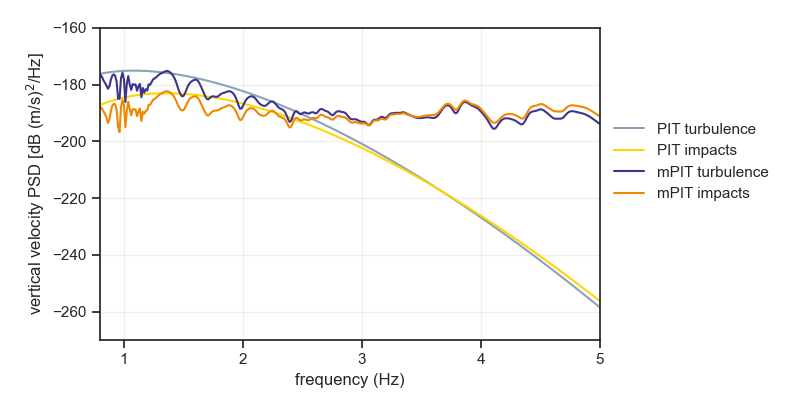

In [16]:
%matplotlib notebook

plt.figure(figsize=(8,4))

plt.plot(freq, turbulencePSD_comparison_dB, color=gTurbColor, label='PIT turbulence')
plt.plot(freq, impactsPSD_comparison_dB, color=gImpColor, label='PIT impacts')

plt.plot(f, num_turb_dB, color=fTurbColor, label='mPIT turbulence')
plt.plot(f, num_imp_dB, color=fImpColor, label='mPIT impacts')

plt.grid(alpha=0.3)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
plt.xticks(np.arange(0, 6, 1.0))

# for v1:
#plt.yticks(np.arange(-300, -85, 20.0))
#plt.ylim(-300, -75)

# for v2:
plt.ylim(-270, -160)

plt.xlim(0.8, 5)
plt.subplots_adjust(top=0.93, right=0.75, bottom=0.15)
plt.legend(frameon=False, bbox_to_anchor=(1, 0.4), loc='lower left')
# plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/mod-full-PSD-comparision-default-inputs-v2.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


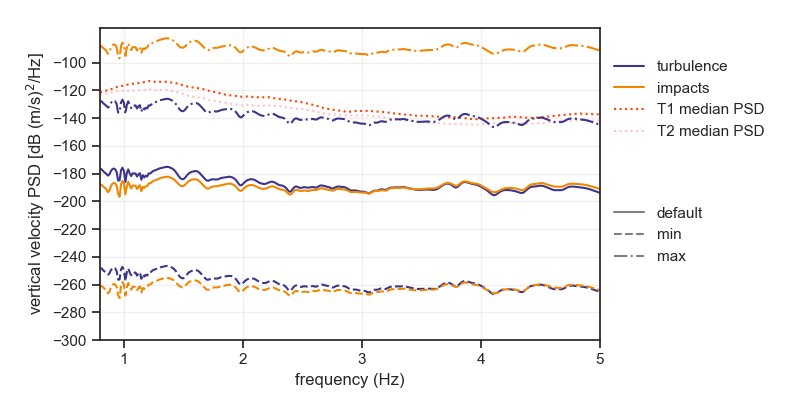

In [17]:
%matplotlib notebook

ax = plt.figure(figsize=(8,4))

legend_elements = [Line2D([0], [0], color=fTurbColor, linestyle='-', label='turbulence'), 
                   Line2D([0], [0], color=fImpColor, linestyle='-', label='impacts'),
                   Line2D([0], [0], color='orangered', linestyle=':', label='T1 median PSD',),
                   Line2D([0], [0], color='pink', linestyle=':', label='T2 median PSD',)]
leg = plt.legend(handles=legend_elements, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.6), loc='lower left')

legend_elements1 = [Line2D([0], [0], color='gray', linestyle='-', label='default'), 
                   Line2D([0], [0], color='gray', linestyle='--', label='min'),
                   Line2D([0], [0], color='gray', linestyle='-.', label='max')]
leg1 = plt.legend(handles=legend_elements1, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.2), loc='lower left')

ax.add_artist(leg)

plt.plot(pavlof_t1[:,0], 10*np.log10(pavlof_t1[:,1]), linestyle=':', color='orangered')
plt.plot(pavlof_t2[:,0], 10*np.log10(pavlof_t2[:,1]), linestyle=':', color='pink')

# plt.plot(freq, turbulencePSD_comparison_max_dB, color=gTurbColor, label='PIT turbulence')
# plt.plot(freq, impactsPSD_comparison_max_dB, color=gImpColor, label='PIT impacts')

plt.plot(f, num_turb_dB, color=fTurbColor, label='turbulence')
plt.plot(f, num_turb_min_dB, color=fTurbColor, linestyle='--')
plt.plot(f, num_turb_max_dB, color=fTurbColor, linestyle='-.')

plt.plot(f, num_imp_dB, color=fImpColor, label='impacts')
plt.plot(f, num_imp_min_dB, color=fImpColor, linestyle='--')
plt.plot(f, num_imp_max_dB, color=fImpColor, linestyle='-.')

plt.grid(alpha=0.3)
plt.subplots_adjust(top=0.93, right=0.75, bottom=0.15)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
# plt.legend()
# plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/full-PSD-fig10-recreation-minmax.png', dpi=300)
plt.show()

In [18]:
import numpy as np
import scipy
import scipy.integrate
from scipy.special import erf
import matplotlib.pyplot as plt
import os

os.chdir('/Users/kcoppess/muspelheim/quail_volcano/src/')

# import compressible_conduit_steady
import compressible_conduit_steady.steady_state as SS
import compressible_conduit_steady.material_properties as matprops

# os.chdir('/Users/kcoppess/muspelheim/quail_ODESS_map/')

In [19]:
Numerics = {
  "SolutionOrder" : 2,
}

Mesh = {
    "NumElemsX" : 1000, 
    "xmin" : -3000.0-150,
    "xmax" : 0.0-150,
}

n_elems_per_part = Mesh["NumElemsX"]
n_elems_global = 2*n_elems_per_part
if Numerics["SolutionOrder"] == 0:
    n_nodes_global = n_elems_global
elif Numerics["SolutionOrder"] == 1:
    n_nodes_global = n_elems_global + 1
elif Numerics["SolutionOrder"] == 2:
    n_nodes_global = 2*n_elems_global + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global = np.linspace(Mesh["xmin"], Mesh["xmax"], n_nodes_global)

phi_crys = 0.4
chi_water = 0.03
yWt_init = chi_water * (1 - phi_crys) / (1 + chi_water)
yC_init = phi_crys

p_vent = 1e5          # Vent pressure
n0 = chi_water
Sm = 5e-6

props = {
    "yC": yC_init,
    "yWt": yWt_init,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.00001,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n0 / Sm)**2,
    "solubility_k": Sm,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

In [ ]:
# f = SS.SteadyState(x_global, 1e5, 60e6, input_type='p', override_properties=props)
# forward_p = np.linspace(10e6, 30e6, 5)
# forward_j0 = np.linspace(200, 1600, 150)
# mg_p, mg_j0 = np.meshgrid(forward_p, forward_j0)
# parout_p1 = SS.parallel_forward_map(f, mg_p, mg_j0, num_processes=8)

In [ ]:
# p_choked = parout_p1["p_top"][np.argwhere(parout_p1["x_top"] >= -150)]
# vel_top_choked = parout_p1["vel_top"][np.argwhere(parout_p1["x_top"] >= -150)]

# fil_mg_p = mg_p[np.argwhere(parout_p1["x_top"] >= -150)].astype('int')
# fil_mg_j0 = mg_j0[np.argwhere(parout_p1["x_top"] >= -150)].astype('int')

In [ ]:
# %matplotlib notebook
# colors = ['red', 'blue', 'black', 'orange', 'green']

# plt.figure(figsize=(7,7))

# plt.subplot(2,1,1)
# for ii in range(4):
#     plt.plot(fil_mg_j0[:,:,ii].ravel(), p_choked[:,:,ii].ravel(), '.', color=colors[ii])
# plt.axhline(1e5, linestyle='--')
# plt.yscale('log')
# plt.ylabel('pressure at top of domain (Pa)')
# plt.xlabel('inlet mass flux = rho*u')
# plt.subplot(2,1,2)
# for ii in range(4):
#     plt.plot(fil_mg_j0[:,:,ii].ravel(), vel_top_choked[:,:, ii].ravel(), '.', color=colors[ii], label=str(forward_p[ii]/1e6)+' MPa')
# plt.legend()
# plt.ylabel('u at top of domain (m/s)')
# plt.xlabel('inlet mass flux = rho*u')
# plt.tight_layout()
# # plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/forward-search-3km-3wt-0sm-tf0s-lowerChamberPressure.png', dpi=300)
# plt.show()

In [20]:
x1 = x_global.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))

plow = 90e6 

f1 = SS.SteadyState(x1, p_vent, plow, input_type='p', override_properties=props)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)
soln_quail1 = f1(x_quail, io_format="quail")
u1 = soln_quail1[:,0,3] / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)
rho_g1 = (soln_quail1[:,0,0] + soln_quail1[:,0,1]) / phi1

134002.03643761188 and 133314.06217843533
1.0024077795693063 and -0.1
Computed choking mass flux: 1531.0938127404188; choking pressure: 133314.05366459684.
Choked at vent.


In [53]:
print(round(soln_quail1[-1,0,3]*np.pi*20**2*1e-6,2))
print(u1[-1]/c1[-1])

1.92
0.9948717116312289


<IPython.core.display.Javascript object>


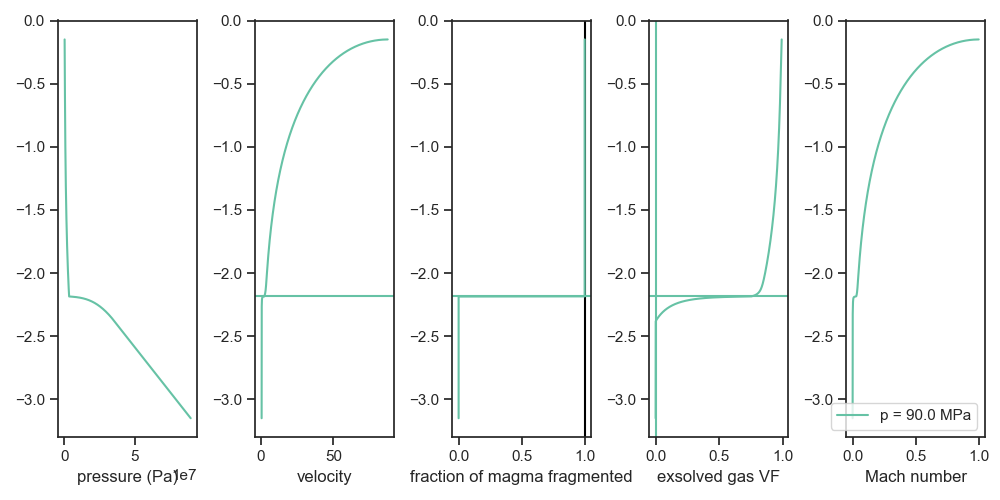

In [21]:
%matplotlib notebook
frag_depth = np.argwhere(phi1 > 0.75)[0,0]

x = x_global.copy()

# end_frag = np.argwhere((yFsoln1 / (1.0 - y1)) >= 1)[0,0]

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.plot(p1, x*1e-3, '-')
# plt.ylim(-1.15, x[end_frag]*1e-3)
plt.xlabel('pressure (Pa)')
plt.subplot(1,5,2)
plt.plot(u1, x*1e-3, '-')
plt.axhline(x[frag_depth]*1e-3)
# plt.ylim(-1.15, x[end_frag]*1e-3)
plt.xlabel('velocity')
plt.subplot(1,5,3)
plt.axvline(1.0, color='k')
plt.axhline(x[frag_depth]*1e-3)
plt.plot(yFsoln1 / (1.0 - y1), (x)*1e-3, '-')
# plt.ylim(-1.15, x[end_frag]*1e-3)
# plt.ylim(-0.55, -0.5)
plt.xlabel('fraction of magma fragmented')
plt.subplot(1,5,4)
plt.plot(phi1, x*1e-3, '-')
plt.axvline(0)
plt.axhline(x[frag_depth]*1e-3)
# plt.ylim(-1.15, x[end_frag]*1e-3)
plt.xlabel('exsolved gas VF')
plt.subplot(1,5,5)
plt.plot(u1/c1, x*1e-3, '-', label='p = '+str(round(plow*1e-6, 2))+' MPa')
# plt.ylim(-1.15, x[end_frag]*1e-3)
plt.xlabel('Mach number')
plt.legend(frameon=True, loc=4)

plt.tight_layout()
plt.show() 

In [22]:
x = x_global.copy()

frag_depth = np.argwhere(phi1 > 0.75)[0,0]

SS_depths = -x[frag_depth:]
dd = len(SS_depths)
DZ = abs(x[1]-x[0])
SS_u_mean = u1[frag_depth:]
SS_phi_p = 1.0 - phi1[frag_depth:]
SS_rho_g = rho_g1[frag_depth:]

SS_Dr = 1.4e-3 * np.ones(dd) #np.linspace(0.5, 1.4e-3, ll) #1.4e-3
SS_Db = 0.5 * np.ones(dd)

SS_f, SS_gf_hat, SS_gf_time = ext.load_gfs_ES(directory, SS_depths, RETURNTIME=True)

SSnum_imp = ext.impact_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, SS_u_mean, SS_Dr, SS_phi_p, dz = DZ, R=20)
SSnum_imp_integrated = np.sum(SSnum_imp, axis=0)
SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)

SSnum_turb = ext.turbulence_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, SS_u_mean, SS_Db, SS_rho_g, dz = DZ, R=20)
SSnum_turb_integrated = np.sum(SSnum_turb, axis=0)
SSnum_turb_dB = 10 * np.log10(SSnum_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/1671024043.py:19: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:238: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (np.sqrt(2) * gfs[0][:,:,0] + gfs[1][:,:,0])**2
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:241: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * np.abs(FGjz2)


20.21199314152828
0.05900504707019413
2.2869154780971646


<IPython.core.display.Javascript object>


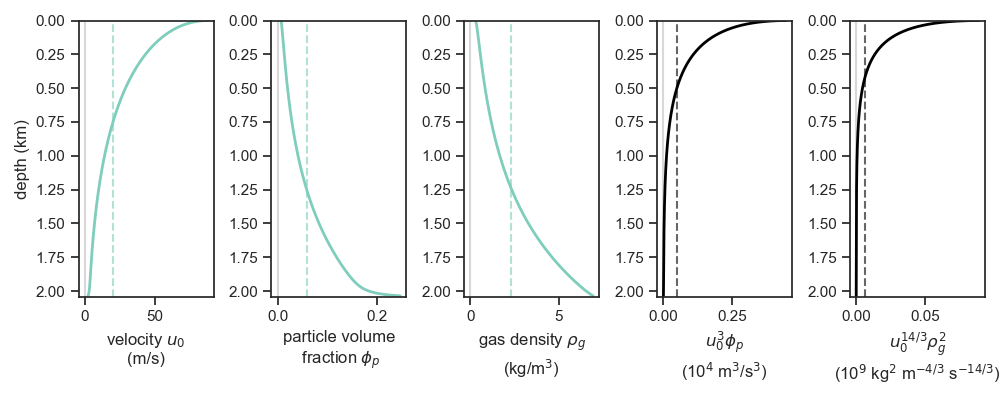

In [23]:
%matplotlib notebook

print(np.average(SS_u_mean))
print(np.average(SS_phi_p))
print(np.average(SS_rho_g))

# '#5E548E', '#9F86C0', '#BE95C4', '#E0B1CB'
SS_depths -= 150

input_color = '#7fcdbb' #'#41b6c4'

plt.figure(figsize=(10,4))

plt.subplot(1,5,1)
plt.axvline(0, color='grey', linestyle='-', alpha=0.3)
plt.axvline(np.average(SS_u_mean), linestyle='--', color=input_color, alpha=0.6)
plt.plot(SS_u_mean, SS_depths*1e-3, color=input_color, linewidth=2)
plt.ylim(SS_depths[0]*1e-3+0.01, SS_depths[-1]*1e-3)
plt.xlabel('velocity $u_0$\n(m/s)')
plt.ylabel('depth (km)')

plt.subplot(1,5,2)
plt.axvline(0, color='grey', linestyle='-', alpha=0.3)
plt.axvline(np.average(SS_phi_p), linestyle='--', color=input_color, alpha=0.6)
plt.plot(SS_phi_p, SS_depths*1e-3, color=input_color, linewidth=2)
plt.ylim(SS_depths[0]*1e-3+0.01, SS_depths[-1]*1e-3)
plt.xlabel('particle volume\n fraction $\phi_p$')

plt.subplot(1,5,3)
plt.axvline(0, color='grey', linestyle='-', alpha=0.3)
plt.axvline(np.average(SS_rho_g), linestyle='--', color=input_color, alpha=0.6)
plt.plot(SS_rho_g, SS_depths*1e-3, color=input_color, linewidth=2)
plt.ylim(SS_depths[0]*1e-3+0.01, SS_depths[-1]*1e-3)
plt.xlabel('gas density $\\rho_g$\n(kg/m$^3$)')

plt.subplot(1,5,4)
plt.axvline(0, color='grey', linestyle='-', alpha=0.3)
plt.axvline(np.average(SS_u_mean)**3 * np.average(SS_phi_p)*1e-4, linestyle='--', color='black', alpha=0.6)
plt.plot(SS_u_mean**3 * SS_phi_p * 1e-4, SS_depths*1e-3, color='black', linewidth=2)
plt.ylim(SS_depths[0]*1e-3+0.01, SS_depths[-1]*1e-3)
plt.xlabel('$u_0^3 \phi_p$\n(10$^4$ m$^3$/s$^3$)')

plt.subplot(1,5,5)
plt.axvline(0, color='grey', linestyle='-', alpha=0.3)
plt.axvline(np.average(SS_u_mean)**(14/3) * np.average(SS_rho_g)**2 * 1e-9, linestyle='--', color='black', alpha=0.6)
plt.plot(SS_u_mean**(14/3) * SS_rho_g**2 * 1e-9, SS_depths*1e-3, color='black', linewidth=2)
plt.ylim(SS_depths[0]*1e-3+0.01, SS_depths[-1]*1e-3)
plt.xlabel('$u_0^{14/3} \\rho_g^2$\n(10$^9$ kg$^2$ m$^{-4/3}$ s$^{-14/3}$)')

SS_depths += 150

plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-state-3km-inputfields.png', dpi=300)
plt.show() 

In [24]:
averageSS_u_mean = np.average(SS_u_mean) * np.ones(dd)
averageSS_phi_p = np.average(SS_phi_p) * np.ones(dd)
averageSS_rho_g = np.average(SS_rho_g) * np.ones(dd)

averageSSnum_imp = ext.impact_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, averageSS_u_mean, SS_Dr, averageSS_phi_p, dz = DZ, R=20)
averageSSnum_imp_integrated = np.sum(averageSSnum_imp, axis=0)
averageSSnum_imp_dB = 10 * np.log10(averageSSnum_imp_integrated)

averageSSnum_turb = ext.turbulence_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, averageSS_u_mean, SS_Db, averageSS_rho_g, dz = DZ, R=20)
averageSSnum_turb_integrated = np.sum(averageSSnum_turb, axis=0)
averageSSnum_turb_dB = 10 * np.log10(averageSSnum_turb_integrated)

impactsPSD_mod_2 = mod.impact_PSD(freq, u_mean=np.average(SS_u_mean), df=(DZ*dd), phi_p=np.average(SS_phi_p),
                              Dr=1.4e-3, R=20, rx=10e3, Q=30, rho_s=2700)
impactsPSD_mod_2_dB = 10 * np.log10(impactsPSD_mod_2)

turbulencePSD_mod_2 = mod.turbulence_PSD(freq, u_mean=np.average(SS_u_mean), df=(DZ*dd), rho_g=np.average(SS_rho_g), 
                                     Db=0.5, R=20, rx=10e3, Q=30, rho_s=2700)
turbulencePSD_mod_2_dB = 10 * np.log10(turbulencePSD_mod_2)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/3945608230.py:7: RuntimeWarning: divide by zero encountered in log10
  averageSSnum_imp_dB = 10 * np.log10(averageSSnum_imp_integrated)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:238: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (np.sqrt(2) * gfs[0][:,:,0] + gfs[1][:,:,0])**2
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:241: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * np.abs(FGjz2)


In [ ]:
print(np.average(SS_u_mean))
print(np.average(SS_phi_p))
print(np.average(SS_rho_g))

In [25]:
averageSS_u_mean3_phi_p = np.average(SS_u_mean**3 * SS_phi_p) * np.ones(dd)
# averageSS_phi_p = np.average(SS_phi_p) * np.ones(dd)
averageSS_u_mean14_3_rho_g2 = np.average(SS_u_mean**(14/3) * SS_rho_g**2) * np.ones(dd)

aveIntegrandSSnum_imp = ext.impact_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, np.ones(dd), SS_Dr, averageSS_u_mean3_phi_p, dz = DZ, R=20)
aveIntegrandSSnum_imp_integrated = np.sum(aveIntegrandSSnum_imp, axis=0)
aveIntegrandSSnum_imp_dB = 10 * np.log10(aveIntegrandSSnum_imp_integrated)

aveIntegrandSSnum_turb = ext.turbulence_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, np.ones(dd), SS_Db, np.sqrt(averageSS_u_mean14_3_rho_g2), dz = DZ, R=20)
aveIntegrandSSnum_turb_integrated = np.sum(aveIntegrandSSnum_turb, axis=0)
aveIntegrandSSnum_turb_dB = 10 * np.log10(aveIntegrandSSnum_turb_integrated)

impactsPSD_mod_5 = mod.impact_PSD(freq, u_mean=1, df=(DZ*dd), phi_p=np.average(SS_u_mean**3 * SS_phi_p),
                              Dr=1.4e-3, R=20, rx=10e3, Q=30, rho_s=2700)
impactsPSD_mod_5_dB = 10 * np.log10(impactsPSD_mod_5)

turbulencePSD_mod_5 = mod.turbulence_PSD(freq, u_mean=1, df=(DZ*dd), rho_g=np.sqrt(np.average(SS_u_mean**(14/3) * SS_rho_g**2)), 
                                     Db=0.5, R=20, rx=10e3, Q=30, rho_s=2700)
turbulencePSD_mod_5_dB = 10 * np.log10(turbulencePSD_mod_5)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/1457086551.py:7: RuntimeWarning: divide by zero encountered in log10
  aveIntegrandSSnum_imp_dB = 10 * np.log10(aveIntegrandSSnum_imp_integrated)


<IPython.core.display.Javascript object>


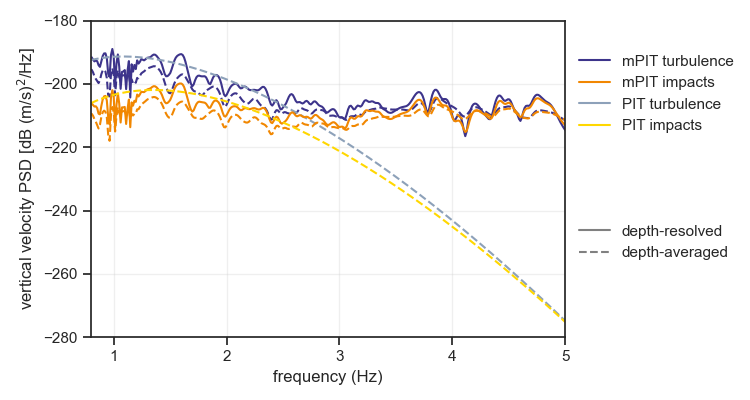

In [31]:
%matplotlib notebook

ax = plt.figure(figsize=(7.5,4))

legend_elements = [Line2D([0], [0], color=fTurbColor, linestyle='-', label='mPIT turbulence'), 
                   Line2D([0], [0], color=fImpColor, linestyle='-', label='mPIT impacts'),
                   Line2D([0], [0], color=gTurbColor, linestyle='-', label='PIT turbulence'),
                   Line2D([0], [0], color=gImpColor, linestyle='-', label='PIT impacts')]
leg = plt.legend(handles=legend_elements, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.6), loc='lower left')

legend_elements1 = [Line2D([0], [0], color='gray', linestyle='-', label='depth-resolved'), 
                   Line2D([0], [0], color='gray', linestyle='--', label='depth-averaged')]
leg1 = plt.legend(handles=legend_elements1, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.2), loc='lower left')

ax.add_artist(leg)

plt.plot(SS_f, SSnum_turb_dB, color=fTurbColor)
plt.plot(SS_f, averageSSnum_turb_dB, '--', color=fTurbColor)
plt.plot(freq, turbulencePSD_mod_2_dB, '--', color=gTurbColor)
# plt.plot(SS_f, aveIntegrandSSnum_turb_dB, ':', color='red') #fTurbColor)
# plt.plot(freq, turbulencePSD_mod_5_dB, ':', color= 'red')#gTurbColor)

plt.plot(SS_f, SSnum_imp_dB, color=fImpColor)
plt.plot(SS_f, averageSSnum_imp_dB, '--', color=fImpColor)
plt.plot(freq, impactsPSD_mod_2_dB, '--', color=gImpColor)
# plt.plot(SS_f, aveIntegrandSSnum_imp_dB, ':', color='red') #fTurbColor)
# plt.plot(freq, impactsPSD_mod_5_dB, ':', color= 'red')#gTurbColor)

plt.grid(alpha=0.3)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))

# for both GFs
plt.ylim(-280, -180)

# for full GF only
# plt.ylim(-210, -173)

plt.xlim(0.8, 5)
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/full-vs-average-steady-state-fullGF-vs-RWGF.png', dpi=300)
plt.show()

In [32]:
Dr_lin = np.linspace(0.5, 1.4e-3, dd)

SSnum_imp_lin = ext.impact_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, SS_u_mean, Dr_lin, SS_phi_p, dz = DZ, R=20)
SSnum_imp_lin_integrated = np.sum(SSnum_imp_lin, axis=0)
SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/3373014269.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)


In [33]:
Dr_log = np.logspace(np.log10(0.5), np.log10(1.4e-3), num=dd)

SSnum_imp_log = ext.impact_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, SS_u_mean, Dr_log, SS_phi_p, dz = DZ, R=20)
SSnum_imp_log_integrated = np.sum(SSnum_imp_log, axis=0)
SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/3856334699.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)


In [34]:
Dr_max = 0.5 * np.ones(dd)

SSnum_imp_max = ext.impact_PSD_ES_numGF(SS_f, SS_depths, SS_gf_hat, SS_u_mean, Dr_max, SS_phi_p, dz = DZ, R=20)
SSnum_imp_max_integrated = np.sum(SSnum_imp_max, axis=0)
SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_12519/3852246175.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)


<IPython.core.display.Javascript object>


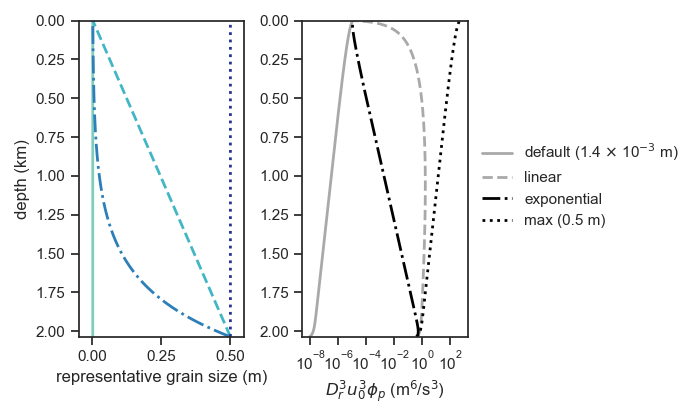

In [40]:
%matplotlib notebook

grain_colors = ['#253494', '#2c7fb8', '#41b6c4', '#7fcdbb']
SS_depths -= 150

plt.figure(figsize=(7,4.2))

plt.subplot(1,2,1)
plt.plot(SS_Dr, SS_depths*1e-3, color=grain_colors[3], linewidth=2, label='default (1.4 $\\times$ 10$^{-3} m)')
plt.plot(Dr_lin, SS_depths*1e-3, color=grain_colors[2], linewidth=2, linestyle='--', label='linear')
plt.plot(Dr_log, SS_depths*1e-3, color=grain_colors[1], linewidth=2, linestyle='-.', label='exponential')
plt.plot(Dr_max, SS_depths*1e-3, color=grain_colors[0], linewidth=2, linestyle=':', label='max (0.5 m)')
plt.ylim(SS_depths[0]*1e-3, SS_depths[-1]*1e-3)
plt.xlim(-0.05, 0.55)

plt.xlabel('representative grain size (m)')
plt.ylabel('depth (km)')

plt.subplot(1,2,2)
plt.plot(SS_Dr**3 * SS_u_mean**3 * SS_phi_p, SS_depths*1e-3, color='darkgrey', linewidth=2, label='default (1.4 $\\times$ 10$^{-3}$ m)')
plt.plot(Dr_lin**3 * SS_u_mean**3 * SS_phi_p, SS_depths*1e-3, color='darkgrey', linewidth=2, linestyle='--', label='linear')
plt.plot(Dr_log**3 * SS_u_mean**3 * SS_phi_p, SS_depths*1e-3, color='black', linewidth=2, linestyle='-.', label='exponential')
plt.plot(Dr_max**3 * SS_u_mean**3 * SS_phi_p, SS_depths*1e-3, color='black', linewidth=2, linestyle=':', label='max (0.5 m)')
plt.ylim(SS_depths[0]*1e-3, SS_depths[-1]*1e-3)
plt.xscale('log')
plt.xticks([10**-8, 10**-6, 10**-4, 10**-2, 1, 10**2])
plt.xlabel('$D_r^3 u_0^3 \phi_p$ (m$^6$/s$^3$)')

plt.legend(frameon=False, fontsize=11, bbox_to_anchor=(1, 0.3), loc='lower left')
plt.tight_layout()

SS_depths += 150
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/grain-size-profiles.png', dpi=300)
plt.show()

In [ ]:
np.logspace(3, -8, num=7)

<IPython.core.display.Javascript object>


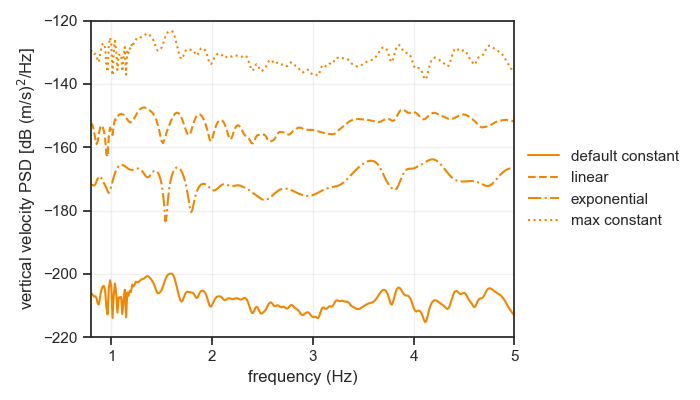

In [41]:
%matplotlib notebook

ax = plt.figure(figsize=(7,4))

plt.plot(SS_f, SSnum_imp_dB, color=fImpColor, label='default constant')
plt.plot(SS_f, SSnum_imp_lin_dB, '--', color=fImpColor, label='linear')
plt.plot(SS_f, SSnum_imp_log_dB, '-.', color=fImpColor, label='exponential')
plt.plot(SS_f, SSnum_imp_max_dB, ':', color=fImpColor, label='max constant')

# plt.plot(pavlof_t1[:,0], 10*np.log10(pavlof_t1[:,1]), linestyle='-', color='orangered')
# plt.plot(pavlof_t2[:,0], 10*np.log10(pavlof_t2[:,1]), linestyle='-', color='pink')

plt.grid(alpha=0.3)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-220, -120)
plt.xlim(0.8, 5)

plt.legend(frameon=False, fontsize=11, bbox_to_anchor=(1, 0.3), loc='lower left')
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/impactsPSD-different-grain-size-profiles.png', dpi=300)
plt.show()

In [38]:
Numerics1 = {
  "SolutionOrder" : 2,
}

Mesh1 = {
    "NumElemsX" : 1000, 
    "xmin" : -3000.0-150,
    "xmax" : 0.0-150,
}

n_elems_per_part1 = Mesh1["NumElemsX"]
n_elems_global1 = 2*n_elems_per_part1
if Numerics1["SolutionOrder"] == 0:
    n_nodes_global1 = n_elems_global1
elif Numerics1["SolutionOrder"] == 1:
    n_nodes_global1 = n_elems_global1 + 1
elif Numerics1["SolutionOrder"] == 2:
    n_nodes_global1 = 2*n_elems_global1 + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global1 = np.linspace(Mesh1["xmin"], Mesh1["xmax"], n_nodes_global1)

phi_crys1 = 0.4
chi_water1 = 0.03
yWt_init1 = chi_water1 * (1 - phi_crys1) / (1 + chi_water1)
yC_init1 = phi_crys1

p_vent1 = 1e5          # Vent pressure
n01 = chi_water1
Sm1 = 5e-6

props1 = {
    "yC": yC_init1,
    "yWt": yWt_init1,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.00001,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n01 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

phi_crys2 = 0.4
chi_water2 = 0.04
yWt_init2 = chi_water2 * (1 - phi_crys2) / (1 + chi_water2)
yC_init2 = phi_crys2
n02 = chi_water2

props2 = {
    "yC": yC_init2,
    "yWt": yWt_init2,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.00001,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n02 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

phi_crys3 = 0.4
chi_water3 = 0.05
yWt_init3 = chi_water3 * (1 - phi_crys3) / (1 + chi_water3)
yC_init3 = phi_crys3
n03 = chi_water3

props3 = {
    "yC": yC_init3,
    "yWt": yWt_init3,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.00001,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n03 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

In [39]:
x1 = x_global1.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))

p_in = 90e6

f1 = SS.SteadyState(x1, p_vent1, p_in, input_type='p', override_properties=props1)
f3 = SS.SteadyState(x1, p_vent1, p_in, input_type='p', override_properties=props2)
f4 = SS.SteadyState(x1, p_vent1, p_in, input_type='p', override_properties=props3)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)
soln_quail1 = f1(x_quail, io_format="quail")
u1 = soln_quail1[:,0,3] / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)
rho_g1 = (soln_quail1[:,0,0] + soln_quail1[:,0,1]) / phi1

soln3 = f3(x1, io_format="phy")
p3, h3, y3, yFsoln3 = soln3[0:4]
T3 = f3.T_ph(p3, h3, y3)
rho3 = 1.0 / f3.v_mix(p3, T3, y3)
soln_quail3 = f3(x_quail, io_format="quail")
u3 = soln_quail3[:,0,3] / rho3
c_fn3 = lambda p, h, yWv: f3.mixture.sound_speed(
  p, f3.T_ph(p, h, yWv), f3.yA, yWv, 1.0 - f3.yA - yWv)
c3 = np.array(list(map(c_fn3, p3, h3, y3)))
phi3 = f3.mixture.vf_g(p3, T3, f3.yA, y3, 1.0-f3.yA-y3)
rho_g3 = (soln_quail3[:,0,0] + soln_quail3[:,0,1]) / phi3

soln4 = f4(x1, io_format="phy")
p4, h4, y4, yFsoln4 = soln4[0:4]
T4 = f4.T_ph(p4, h4, y4)
rho4 = 1.0 / f4.v_mix(p4, T4, y4)
soln_quail4 = f4(x_quail, io_format="quail")
u4 = soln_quail4[:,0,3] / rho4
c_fn4 = lambda p, h, yWv: f4.mixture.sound_speed(
  p, f4.T_ph(p, h, yWv), f4.yA, yWv, 1.0 - f4.yA - yWv)
c4 = np.array(list(map(c_fn4, p4, h4, y4)))
phi4 = f4.mixture.vf_g(p4, T4, f4.yA, y4, 1.0-f4.yA-y4)
rho_g4 = (soln_quail4[:,0,0] + soln_quail4[:,0,1]) / phi4

KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
# frag_depth = np.argwhere(phi1 > 0.75)[0,0]

x = x_global1.copy()

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.plot(p1, x*1e-3, '.-')
plt.xlabel('pressure (Pa)')
plt.subplot(1,5,2)
plt.plot(u1, x*1e-3, '.-')
# plt.axhline(x[frag_depth]*1e-3)
plt.xlabel('velocity')
plt.subplot(1,5,3)
plt.plot(yFsoln1 / (1.0 - y1), (x)*1e-3, '.-')
# plt.ylim(-0.55, -0.5)
plt.xlabel('fraction of magma fragmented')
plt.subplot(1,5,4)
plt.plot(u1/c1, x*1e-3, '.-')
plt.xlabel('Mach number')
plt.subplot(1,5,5)
plt.plot(phi1, x*1e-3, '.-', label='p = '+str(round(p_in*1e-6, 2))+' MPa')
plt.axvline(0)
plt.xlabel('exsolved gas VF')
plt.legend(frameon=True, loc=4)

plt.tight_layout()
plt.show() 

In [ ]:
frag_depths_5km = [np.argwhere(phi1 > 0.75)[0,0], np.argwhere(phi3 > 0.75)[0,0], np.argwhere(phi4 > 0.75)[0,0]]
u_mean_5km = [u1, u3, u4]
phi_p_5km = [1-phi1, 1-phi3, 1-phi4]
rho_g_5km = [rho_g1, rho_g3, rho_g4]

In [ ]:
%matplotlib notebook

NN = 3
x = x_global1.copy()+150

labels = [str(chi_water1*100)+' wt%',
         str(chi_water2*100)+' wt%',
         str(chi_water3*100)+' wt%']

ALPHA = 1
fd_color = '#c7e9b4'
colors = ['#7fcdbb', '#41b6c4', '#253494']
integrand_colors = ['silver', 'grey', 'black']
line_styles = ['--', '-', '-.']

plt.figure(figsize=(10,5))

plt.subplot(1,5,1)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=1)
plt.axhline(-x[frag_depths_5km[1]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[1], alpha=ALPHA, label='$d_f$')
for ii in range(NN):
    plt.axhline(-x[frag_depths_5km[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_5km[ii], -x*1e-3, color=colors[ii], linewidth=2, linestyle=line_styles[ii], label=labels[ii])
plt.ylim(3, -x[-1]*1e-3)
plt.xlim(0, u_mean_5km[2][-1])
plt.legend(frameon=True, bbox_to_anchor=(1.03, 0.0001), loc='lower right')
plt.xlabel('velocity $u_0$\n(m/s)')
plt.ylabel('depth (km)')

plt.subplot(1,5,2)
# plt.axvline(0, color='grey', linestyle='--', alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_5km[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(phi_p_5km[ii], -x*1e-3, linewidth=2, color=colors[ii], linestyle=line_styles[ii])
plt.ylim(3, -x[-1]*1e-3)
plt.xlim(0, phi_p_5km[0][frag_depths_5km[0]])
plt.xlabel('particle volume\n fraction $\phi_p$')

plt.subplot(1,5,3)
# plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=1)
for ii in range(NN):
    plt.axhline(-x[frag_depths_5km[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(rho_g_5km[ii], -x*1e-3, linewidth=2, color=colors[ii], linestyle=line_styles[ii])
plt.xlim(0, rho_g_5km[2][frag_depths_5km[2]])
plt.ylim(3, -x[-1]*1e-3)
plt.xlabel('gas density $\\rho_g$\n(kg/m$^3$)')

plt.subplot(1,5,4)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_5km[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_5km[ii]**3 * phi_p_5km[ii] * 1e-4, -x*1e-3, linewidth=2, color=integrand_colors[ii], linestyle=line_styles[ii])
# plt.xlim(-5, rho_g_5km[2][frag_depths_5km[2]])
plt.ylim(3, -x[-1]*1e-3)
plt.xlabel('$u_0^3 \phi_p$\n(10$^4$ m$^3$/s$^3$)')

plt.subplot(1,5,5)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_5km[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_5km[ii]**(14/3) * rho_g_5km[ii]**2 * 1e-9, -x*1e-3, linewidth=2, color=integrand_colors[ii], linestyle=line_styles[ii])
# plt.xlim(-5, rho_g_5km[2][frag_depths_5km[2]])
plt.ylim(3, -x[-1]*1e-3)
plt.xlabel('$u_0^{14/3} \\rho_g^2$\n(10$^9$ kg$^2$ m$^{-4/3}$ s$^{-14/3}$)')

x = x_global1.copy()

plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-states-3km-differentVolatileContent.png', dpi=300)
plt.show() 

In [ ]:
frag_depth = min(frag_depths_5km)

depths = -x[frag_depth:]
ll = len(depths)
DZ_5km = abs(depths[0]-depths[1])

Dr = 1.4e-3 * np.ones(ll)
Db = 0.5 * np.ones(ll)

In [ ]:
directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric3535m_BooreJoyner_conduit/extended_6km_sf/10km/'
f, gf_hat, gf_time = ext.load_gfs_ES(directory, depths, RETURNTIME=True)

In [ ]:
FF = len(f)
NN=3
impacts = np.zeros((NN, FF))
turbulence = np.zeros((NN, FF))

impacts_dB = np.zeros((NN, FF))
turbulence_dB = np.zeros((NN, FF))

for ii, DF in zip(np.arange(NN), frag_depths_5km):
    shift = DF - frag_depth
    
    imps = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean_5km[ii][frag_depth:], Dr, phi_p_5km[ii][frag_depth:], dz=DZ_5km, R=20)
    impacts[ii] = np.sum(imps[shift:], axis=0)
    
    turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean_5km[ii][frag_depth:], Db, rho_g_5km[ii][frag_depth:], dz=DZ_5km, R=20)
    turbulence[ii] = np.sum(turb[shift:], axis=0)
    
impacts_dB = 10 * np.log10(impacts)
turbulence_dB = 10 * np.log10(turbulence)

In [ ]:
%matplotlib notebook

labels = [str(chi_water1*100)+' wt%',
         str(chi_water2*100)+' wt%',
         str(chi_water3*100)+' wt%']

# labels = ['$p_{inlet}$ = 172 MPa',
#          '$p_{inlet}$ = 110 MPa',
#          '$p_{inlet}$ = 60 MPa']

line_styles = ['--', '-', '-.']

ax = plt.figure(figsize=(7.5,4))

legend_elements = [Line2D([0], [0], color=fTurbColor, linestyle='-', label='mPIT turbulence'), 
                   Line2D([0], [0], color=fImpColor, linestyle='-', label='mPIT impacts')]
leg = plt.legend(handles=legend_elements, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.6), loc='lower left')

legend_elements1 = [Line2D([0], [0], color='gray', linestyle='--', label=labels[0]), 
                   Line2D([0], [0], color='gray', linestyle='-', label=labels[1]),
                   Line2D([0], [0], color='gray', linestyle='-.', label=labels[2])]
leg1 = plt.legend(handles=legend_elements1, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.2), loc='lower left')

ax.add_artist(leg)

for ii in range(NN):
    plt.plot(f, impacts_dB[ii], color=fImpColor, linestyle=line_styles[ii])#, alpha=(NN-ii)/NN)
    plt.plot(f, turbulence_dB[ii], color=fTurbColor, linestyle=line_styles[ii])#, alpha=(NN-ii)/NN)

plt.grid(alpha=0.3)
plt.subplots_adjust(top=0.93, right=0.75, bottom=0.15)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-220, -165)
# plt.ylim(-215, -178)
plt.xlim(0.8, 5)
# plt.legend()
# plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-state-3km-PSDs-differentVolatileContent.png', dpi=300)
plt.show()

In [40]:
Numerics1 = {
  "SolutionOrder" : 2,
}

Mesh1 = {
    "NumElemsX" : 1000, 
    "xmin" : -3000.0-150,
    "xmax" : 0.0-150,
}

n_elems_per_part1 = Mesh1["NumElemsX"]
n_elems_global1 = 2*n_elems_per_part1
if Numerics1["SolutionOrder"] == 0:
    n_nodes_global1 = n_elems_global1
elif Numerics1["SolutionOrder"] == 1:
    n_nodes_global1 = n_elems_global1 + 1
elif Numerics1["SolutionOrder"] == 2:
    n_nodes_global1 = 2*n_elems_global1 + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global1 = np.linspace(Mesh1["xmin"], Mesh1["xmax"], n_nodes_global1)

phi_crys1 = 0.4
chi_water1 = 0.03
yWt_init1 = chi_water1 * (1 - phi_crys1) / (1 + chi_water1)
yC_init1 = phi_crys1

p_vent1 = 1e5          # Vent pressure
n01 = chi_water1
Sm1 = 5e-6

props_waning = {
    "yC": yC_init1,
    "yWt": yWt_init1,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.00001,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n01 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

In [41]:
x1 = x_global1.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))

f1 = SS.SteadyState(x1, p_vent1, 25e6, input_type='p', override_properties=props_waning)
f3 = SS.SteadyState(x1, p_vent1, 35e6, input_type='p', override_properties=props_waning)
# f4 = SS.SteadyState(x1, p_vent1, 65e6, input_type='p', override_properties=props_waning)
f5 = SS.SteadyState(x1, p_vent1, 45e6, input_type='p', override_properties=props_waning)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)
soln_quail1 = f1(x_quail, io_format="quail")
u1 = soln_quail1[:,0,3] / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)
rho_g1 = (soln_quail1[:,0,0] + soln_quail1[:,0,1]) / phi1

soln3 = f3(x1, io_format="phy")
p3, h3, y3, yFsoln3 = soln3[0:4]
T3 = f3.T_ph(p3, h3, y3)
rho3 = 1.0 / f3.v_mix(p3, T3, y3)
soln_quail3 = f3(x_quail, io_format="quail")
u3 = soln_quail3[:,0,3] / rho3
c_fn3 = lambda p, h, yWv: f3.mixture.sound_speed(
  p, f3.T_ph(p, h, yWv), f3.yA, yWv, 1.0 - f3.yA - yWv)
c3 = np.array(list(map(c_fn3, p3, h3, y3)))
phi3 = f3.mixture.vf_g(p3, T3, f3.yA, y3, 1.0-f3.yA-y3)
rho_g3 = (soln_quail3[:,0,0] + soln_quail3[:,0,1]) / phi3

# soln4 = f4(x1, io_format="phy")
# p4, h4, y4, yFsoln4 = soln4[0:4]
# T4 = f4.T_ph(p4, h4, y4)
# rho4 = 1.0 / f4.v_mix(p4, T4, y4)
# soln_quail4 = f4(x_quail, io_format="quail")
# u4 = soln_quail4[:,0,3] / rho4
# c_fn4 = lambda p, h, yWv: f4.mixture.sound_speed(
#   p, f4.T_ph(p, h, yWv), f4.yA, yWv, 1.0 - f4.yA - yWv)
# c4 = np.array(list(map(c_fn4, p4, h4, y4)))
# phi4 = f4.mixture.vf_g(p4, T4, f4.yA, y4, 1.0-f4.yA-y4)
# rho_g4 = (soln_quail4[:,0,0] + soln_quail4[:,0,1]) / phi4

soln5 = f5(x1, io_format="phy")
p5, h5, y5, yFsoln5 = soln5[0:4]
T5 = f5.T_ph(p5, h5, y5)
rho5 = 1.0 / f5.v_mix(p5, T5, y5)
soln_quail5 = f5(x_quail, io_format="quail")
u5 = soln_quail5[:,0,3] / rho5
c_fn5 = lambda p, h, yWv: f5.mixture.sound_speed(
  p, f5.T_ph(p, h, yWv), f5.yA, yWv, 1.0 - f5.yA - yWv)
c5 = np.array(list(map(c_fn5, p5, h5, y5)))
phi5 = f5.mixture.vf_g(p5, T5, f5.yA, y5, 1.0-f5.yA-y5)
rho_g5 = (soln_quail5[:,0,0] + soln_quail5[:,0,1]) / phi5

56821.43804665571 and 56787.61972998541
1.0024929890591094 and 1.0024988626535487
Computed choking mass flux: 638.4766616245348; choking pressure: 56547.962680064826.
Subsonic flow at vent. Shooting method for correct value of z.


/Users/kcoppess/muspelheim/quail_volcano/src/compressible_conduit_steady/material_properties.py:168: RuntimeWarning: invalid value encountered in log
  return self.K/self.rho0 * (u - np.log(1 + u))


Solution j0 found. Computing solution.
67544.24077301678 and 3840435.017079207
1.0024546126812166 and -0.1
Computed choking mass flux: 758.9485869841953; choking pressure: 67049.73074555858.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.
79416.55499096491 and 79416.55197106343
-0.1 and -0.1
Computed choking mass flux: 901.658458149117; choking pressure: 79416.56302882174.
Subsonic flow at vent. Shooting method for correct value of z.
Solution j0 found. Computing solution.


In [50]:
print(u1[-1]/c1[-1], u3[-1]/c3[-1], u5[-1]/c5[-1])

0.4453802723281059 0.5749340953481696 0.8605945368435716


In [42]:
# frag_depths_waning = [np.argwhere(phi1 > 0.75)[0,0], np.argwhere(phi3 > 0.75)[0,0], np.argwhere(phi5 > 0.75)[0,0], np.argwhere(phi4 > 0.75)[0,0]]
# u_mean_waning = [u1, u3, u5, u4]
# phi_p_waning = [1-phi1, 1-phi3, 1-phi5, 1-phi4]
# rho_g_waning = [rho_g1, rho_g3, rho_g5, rho_g4]

frag_depths_waning = [np.argwhere(phi1 > 0.75)[0,0], np.argwhere(phi3 > 0.75)[0,0], np.argwhere(phi5 > 0.75)[0,0]]
u_mean_waning = [u1, u3, u5]
phi_p_waning = [1-phi1, 1-phi3, 1-phi5]
rho_g_waning = [rho_g1, rho_g3, rho_g5]

<IPython.core.display.Javascript object>


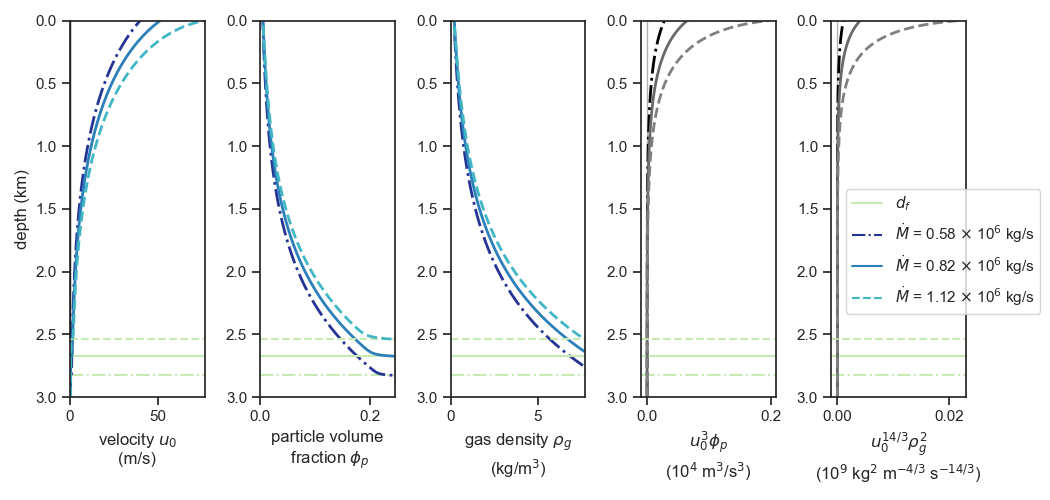

In [44]:
%matplotlib notebook

NN = 3
x = x_global1.copy() + 150

labels = ['$\dot{M}$ = '+str(round(soln_quail1[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
          '$\dot{M}$ = '+str(round(soln_quail3[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
          '$\dot{M}$ = '+str(round(soln_quail5[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s']

# labels = [str(round(soln_quail1[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
#           str(round(soln_quail3[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
#           str(round(soln_quail5[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
#           str(round(soln_quail4[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s']

# labels = ['$p_{ch}$ = 25 MPa',
#           '$p_{ch}$ = 35 MPa',
#           '$p_{ch}$ = 45 MPa',
#           '$p_{ch}$ = 65 MPa']

ALPHA = 1
fd_color = '#c7e9b4'
colors = ['#253494', '#2c7fb8', '#41b6c4', '#7fcdbb']
# colors = ['#7fcdbb', '#41b6c4', '#253494']
integrand_colors = ['black', 'dimgray', 'grey', 'silver']#['silver', 'grey', 'dimgray', 'black']
line_styles = ['-.', '-', '--', ':']

plt.figure(figsize=(10.5,5))

plt.subplot(1,5,1)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=1)
plt.axhline(-x[frag_depths_waning[1]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[1], alpha=ALPHA, label='$d_f$')
for ii in range(NN):
    plt.axhline(-x[frag_depths_waning[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_waning[ii], -x*1e-3, color=colors[ii], linewidth=2, linestyle=line_styles[ii], label=labels[ii])
plt.ylim(3, -x[-1]*1e-3)
plt.xlim(0, u_mean_waning[-1][-1])
# plt.legend(frameon=True, loc=3, fontsize=10)
plt.xlabel('velocity $u_0$\n(m/s)')
plt.ylabel('depth (km)')

plt.subplot(1,5,2)
# plt.axvline(0, color='grey', linestyle='--', alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_waning[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(phi_p_waning[ii], -x*1e-3, linewidth=2, color=colors[ii], linestyle=line_styles[ii], label=labels[ii])
plt.ylim(3, -x[-1]*1e-3)
plt.xlim(0, phi_p_waning[0][frag_depths_waning[0]])
plt.xlabel('particle volume\n fraction $\phi_p$')

plt.subplot(1,5,3)
# plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=1)
for ii in range(NN):
    plt.axhline(-x[frag_depths_waning[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(rho_g_waning[ii], -x*1e-3, linewidth=2, color=colors[ii], linestyle=line_styles[ii])
plt.xlim(0, rho_g_waning[-1][frag_depths_waning[-1]])
plt.ylim(3, -x[-1]*1e-3)
plt.xlabel('gas density $\\rho_g$\n(kg/m$^3$)')

plt.subplot(1,5,4)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_waning[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_waning[ii]**3 * phi_p_waning[ii] * 1e-4, -x*1e-3, linewidth=2, color=integrand_colors[ii], linestyle=line_styles[ii])
# plt.xlim(-5, rho_g_waning[2][frag_depths_waning[2]])
plt.ylim(3, -x[-1]*1e-3)
plt.xlabel('$u_0^3 \phi_p$\n(10$^4$ m$^3$/s$^3$)')

plt.subplot(1,5,5)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_waning[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_waning[ii]**(14/3) * rho_g_waning[ii]**2 * 1e-9, -x*1e-3, linewidth=2, color=integrand_colors[ii], linestyle=line_styles[ii])
# plt.xlim(-5, rho_g_waning[2][frag_depths_waning[2]])
plt.ylim(3, -x[-1]*1e-3)
plt.xlabel('$u_0^{14/3} \\rho_g^2$\n(10$^9$ kg$^2$ m$^{-4/3}$ s$^{-14/3}$)')

legend_elements1 = [Line2D([0], [0], color=fd_color, linestyle='-', label='$d_f$'),
                   Line2D([0], [0], color=colors[0], linestyle=line_styles[0], label=labels[0]), 
                   Line2D([0], [0], color=colors[1], linestyle=line_styles[1], label=labels[1]),
                   Line2D([0], [0], color=colors[2], linestyle=line_styles[2], label=labels[2])]
leg1 = plt.legend(handles=legend_elements1, frameon=True, fontsize=11, bbox_to_anchor=(0.05, 0.2), loc='lower left')



plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-states-3km-waning.png', dpi=300)
plt.show() 

In [45]:
frag_depth = min(frag_depths_waning)

depths = -x[frag_depth:]
ll = len(depths)
DZ_waning = abs(depths[0]-depths[1])

Dr = 1.4e-3 * np.ones(ll)
Db = 0.5 * np.ones(ll)

In [46]:
directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric3535m_BooreJoyner_conduit/extended_6km_sf/10km/'
f, gf_hat, gf_time = ext.load_gfs_ES(directory, depths, RETURNTIME=True)

In [47]:
FF = len(f)
NN=3
impacts = np.zeros((NN, FF))
turbulence = np.zeros((NN, FF))

impacts_dB = np.zeros((NN, FF))
turbulence_dB = np.zeros((NN, FF))

for ii, DF in zip(np.arange(NN), frag_depths_waning):
    shift = DF - frag_depth
    
    imps = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean_waning[ii][frag_depth:], Dr, phi_p_waning[ii][frag_depth:], dz=DZ_waning, R=20)
    impacts[ii] = np.sum(imps[shift:], axis=0)
#     impacts_dB[ii] = 10 * np.log10(impacts[ii])
    
    turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean_waning[ii][frag_depth:], Db, rho_g_waning[ii][frag_depth:], dz=DZ_waning, R=20)
    turbulence[ii] = np.sum(turb[shift:], axis=0)
#     turbulence_dB[ii] = 10 * np.log10(turbulence[ii])
    
impacts_dB = 10 * np.log10(impacts)
turbulence_dB = 10 * np.log10(turbulence)

/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:238: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (np.sqrt(2) * gfs[0][:,:,0] + gfs[1][:,:,0])**2
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:241: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * np.abs(FGjz2)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_20147/4124437260.py:20: RuntimeWarning: divide by zero encountered in log10
  impacts_dB = 10 * np.log10(impacts)


In [ ]:
print(10*np.log10(np.nanmean(impacts, axis=1)))
print(10*np.log10(np.nanmean(turbulence, axis=1)))

<IPython.core.display.Javascript object>


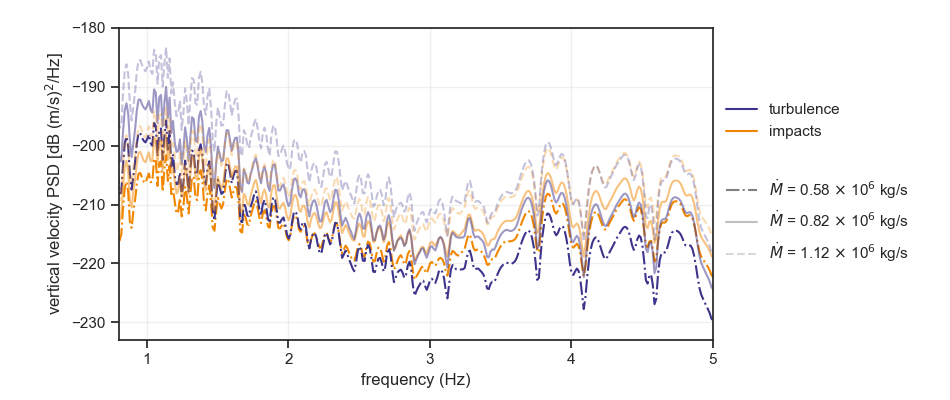

In [48]:
%matplotlib notebook

labels = ['$\dot{M}$ = '+str(round(soln_quail1[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
          '$\dot{M}$ = '+str(round(soln_quail3[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s',
          '$\dot{M}$ = '+str(round(soln_quail5[-1,0,3]*np.pi*20**2*1e-6,2))+' $\\times$ 10$^6$ kg/s']

line_styles = ['-.', '-', '--', ':']
ALPHA = [1, 0.5, 0.3, 0.3]

ax = plt.figure(figsize=(9.5,4))

legend_elements = [Line2D([0], [0], color=fTurbColor, linestyle='-', label='turbulence'), 
                   Line2D([0], [0], color=fImpColor, linestyle='-', label='impacts')]
leg = plt.legend(handles=legend_elements, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.6), loc='lower left')

legend_elements1 = [Line2D([0], [0], color='gray', alpha=ALPHA[0], linestyle=line_styles[0], label=labels[0]), 
                   Line2D([0], [0], color='gray', alpha=ALPHA[1], linestyle=line_styles[1], label=labels[1]),
                   Line2D([0], [0], color='gray', alpha=ALPHA[2], linestyle=line_styles[2], label=labels[2])]
leg1 = plt.legend(handles=legend_elements1, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.2), loc='lower left')

ax.add_artist(leg)

for ii in range(NN):
    if ii ==6 :
        pass
    else:
        plt.plot(f, impacts_dB[ii], color=fImpColor, alpha=ALPHA[ii], linestyle=line_styles[ii])#, alpha=(NN-ii)/NN)
        plt.plot(f, turbulence_dB[ii], color=fTurbColor, alpha=ALPHA[ii], linestyle=line_styles[ii])#, alpha=(NN-ii)/NN)

plt.grid(alpha=0.3)
plt.subplots_adjust(top=0.93, right=0.75, bottom=0.15)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-233, -180)
plt.xlim(0.8, 5)
# plt.legend()
# plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-state-3km-PSDs-waning.png', dpi=300)
plt.show()

In [ ]:
Numerics1 = {
  "SolutionOrder" : 2,
}

Mesh1 = {
    "NumElemsX" : 1000, 
    "xmin" : -1000.0-150,
    "xmax" : 0.0-150,
}

n_elems_per_part1 = Mesh1["NumElemsX"]
n_elems_global1 = 2*n_elems_per_part1
if Numerics1["SolutionOrder"] == 0:
    n_nodes_global1 = n_elems_global1
elif Numerics1["SolutionOrder"] == 1:
    n_nodes_global1 = n_elems_global1 + 1
elif Numerics1["SolutionOrder"] == 2:
    n_nodes_global1 = 2*n_elems_global1 + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global1 = np.linspace(Mesh1["xmin"], Mesh1["xmax"], n_nodes_global1)

phi_crys1 = 0.4
chi_water1 = 0.04
yWt_init1 = chi_water1 * (1 - phi_crys1) / (1 + chi_water1)
yC_init1 = phi_crys1

p_vent1 = 1e5          # Vent pressure
n01 = chi_water1
Sm1 = 5e-6

props_frag1 = {
    "yC": yC_init1,
    "yWt": yWt_init1,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 1.0,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n01 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

props_frag2 = {
    "yC": yC_init1,
    "yWt": yWt_init1,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.10,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n01 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

props_frag3 = {
    "yC": yC_init1,
    "yWt": yWt_init1,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 0.01,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n01 / Sm1)**2,
    "solubility_k": Sm1,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.0,
}

In [ ]:
x1 = x_global1.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))

p_in_frag = 35e6
f1 = SS.SteadyState(x1, p_vent1, p_in_frag, input_type='p', override_properties=props_frag1)
f3 = SS.SteadyState(x1, p_vent1, p_in_frag, input_type='p', override_properties=props_frag2)
f4 = SS.SteadyState(x1, p_vent1, p_in_frag, input_type='p', override_properties=props_frag3)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)
soln_quail1 = f1(x_quail, io_format="quail")
u1 = soln_quail1[:,0,3] / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)
rho_g1 = (soln_quail1[:,0,0] + soln_quail1[:,0,1]) / phi1

soln3 = f3(x1, io_format="phy")
p3, h3, y3, yFsoln3 = soln3[0:4]
T3 = f3.T_ph(p3, h3, y3)
rho3 = 1.0 / f3.v_mix(p3, T3, y3)
soln_quail3 = f3(x_quail, io_format="quail")
u3 = soln_quail3[:,0,3] / rho3
c_fn3 = lambda p, h, yWv: f3.mixture.sound_speed(
  p, f3.T_ph(p, h, yWv), f3.yA, yWv, 1.0 - f3.yA - yWv)
c3 = np.array(list(map(c_fn3, p3, h3, y3)))
phi3 = f3.mixture.vf_g(p3, T3, f3.yA, y3, 1.0-f3.yA-y3)
rho_g3 = (soln_quail3[:,0,0] + soln_quail3[:,0,1]) / phi3

soln4 = f4(x1, io_format="phy")
p4, h4, y4, yFsoln4 = soln4[0:4]
T4 = f4.T_ph(p4, h4, y4)
rho4 = 1.0 / f4.v_mix(p4, T4, y4)
soln_quail4 = f4(x_quail, io_format="quail")
u4 = soln_quail4[:,0,3] / rho4
c_fn4 = lambda p, h, yWv: f4.mixture.sound_speed(
  p, f4.T_ph(p, h, yWv), f4.yA, yWv, 1.0 - f4.yA - yWv)
c4 = np.array(list(map(c_fn4, p4, h4, y4)))
phi4 = f4.mixture.vf_g(p4, T4, f4.yA, y4, 1.0-f4.yA-y4)
rho_g4 = (soln_quail4[:,0,0] + soln_quail4[:,0,1]) / phi4

In [ ]:
%matplotlib notebook
# frag_depth = np.argwhere(phi4 > 0.75)[0,0]

print(p1[-1])

x = x_global1.copy()

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.plot(p1, x*1e-3, '.-')
plt.plot(p3, x*1e-3, '.-')
plt.xlim(0,1e6)
plt.xlabel('pressure (Pa)')
plt.subplot(1,5,2)
plt.plot(u1, x*1e-3, '.-')
plt.plot(u3, x*1e-3, '.-')
# plt.axhline(x[frag_depth]*1e-3)
plt.xlabel('velocity')
plt.subplot(1,5,3)
plt.plot(yFsoln1 / (1.0 - y1), (x)*1e-3, '.-')
plt.plot(yFsoln3 / (1.0 - y3), (x)*1e-3, '.-')
# plt.ylim(-0.55, -0.5)
plt.xlabel('fraction of magma fragmented')
plt.subplot(1,5,4)
plt.plot(u1/c1, x*1e-3, '.-')#, label='p = '+str(round(p_in*1e-6, 2))+' MPa')
plt.plot(u3/c3, x*1e-3, '.-')
plt.xlabel('Mach number')
plt.subplot(1,5,5)
plt.plot(phi1, x*1e-3, '.-')
plt.plot(phi3, x*1e-3, '.-')
plt.axvline(0)
plt.xlabel('exsolved gas VF')
# plt.legend(frameon=True, loc=4)

plt.tight_layout()
plt.show() 

In [ ]:
frag_depths_frag = [np.argwhere(phi1 > 0.75)[0,0], np.argwhere(phi3 > 0.75)[0,0], np.argwhere(phi4 > 0.75)[0,0]]
u_mean_frag = [u1, u3, u4]
phi_p_frag = [1-phi1, 1-phi3, 1-phi4]
rho_g_frag = [rho_g1, rho_g3, rho_g4]

In [ ]:
%matplotlib notebook

NN = 3
x = x_global1.copy() + 150

labels = ['$t_{f}$ = '+str(props_frag1["tau_f"]),
         '$t_{f}$ = '+str(props_frag2["tau_f"]),
         '$t_{f}$ = '+str(props_frag3["tau_f"])]

ALPHA = 1
fd_color = '#c7e9b4'
colors = ['#7fcdbb', '#41b6c4', '#253494']
integrand_colors = ['silver', 'grey', 'black']
line_styles = ['--', '-', '-.']

plt.figure(figsize=(10,5))

plt.subplot(1,5,1)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=1)
plt.axhline(-x[frag_depths_frag[1]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[1], alpha=ALPHA, label='$d_f$')
for ii in range(NN):
    plt.axhline(-x[frag_depths_frag[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_frag[ii], -x*1e-3, color=colors[ii], linewidth=2, linestyle=line_styles[ii], label=labels[ii])
plt.ylim(1, -x[-1]*1e-3)
plt.xlim(0, u_mean_frag[2][-1])
plt.legend(frameon=True, loc=9)
plt.xlabel('velocity $u_0$\n(m/s)')
plt.ylabel('depth (km)')

plt.subplot(1,5,2)
# plt.axvline(0, color='grey', linestyle='--', alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_frag[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(phi_p_frag[ii], -x*1e-3, linewidth=2, color=colors[ii], linestyle=line_styles[ii], label=labels[ii])
plt.ylim(1, -x[-1]*1e-3)
plt.xlim(0, phi_p_frag[0][frag_depths_frag[0]])
plt.xlabel('particle volume\n fraction $\phi_p$')

plt.subplot(1,5,3)
# plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=1)
for ii in range(NN):
    plt.axhline(-x[frag_depths_frag[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(rho_g_frag[ii], -x*1e-3, linewidth=2, color=colors[ii], linestyle=line_styles[ii])
plt.xlim(0, rho_g_frag[2][frag_depths_frag[2]])
plt.ylim(1, -x[-1]*1e-3)
plt.xlabel('gas density $\\rho_g$\n(kg/m$^3$)')

plt.subplot(1,5,4)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_frag[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_frag[ii]**3 * phi_p_frag[ii] * 1e-4, -x*1e-3, linewidth=2, color=integrand_colors[ii], linestyle=line_styles[ii])
# plt.xlim(-5, rho_g_frag[2][frag_depths_frag[2]])
plt.ylim(1, -x[-1]*1e-3)
plt.xlabel('$u_0^3 \phi_p$\n(10$^4$ m$^3$/s$^3$)')

plt.subplot(1,5,5)
plt.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
for ii in range(NN):
    plt.axhline(-x[frag_depths_frag[ii]]*1e-3, linewidth=1.5, color=fd_color, linestyle=line_styles[ii], alpha=ALPHA)
    plt.plot(u_mean_frag[ii]**(14/3) * rho_g_frag[ii]**2 * 1e-9, -x*1e-3, linewidth=2, color=integrand_colors[ii], linestyle=line_styles[ii])
# plt.xlim(-5, rho_g_frag[2][frag_depths_frag[2]])
plt.ylim(1, -x[-1]*1e-3)
plt.xlabel('$u_0^{14/3} \\rho_g^2$\n(10$^9$ kg$^2$ m$^{-4/3}$ s$^{-14/3}$)')

x = x_global1.copy()

plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-states-1km-frag-timescales.png', dpi=300)
plt.show() 

In [ ]:
frag_depth = min(frag_depths_frag)

depths = -x[frag_depth:]
ll = len(depths)
DZ_frag = abs(depths[0]-depths[1])

Dr = 1.4e-3 * np.ones(ll)
Db = 0.5 * np.ones(ll)

In [ ]:
directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric3535m_BooreJoyner_conduit/extended_6km_sf/10km/'
f, gf_hat, gf_time = ext.load_gfs_ES(directory, depths, RETURNTIME=True)

In [ ]:
FF = len(f)
NN=3
impacts = np.zeros((NN, FF))
turbulence = np.zeros((NN, FF))

impacts_dB = np.zeros((NN, FF))
turbulence_dB = np.zeros((NN, FF))

for ii, DF in zip(np.arange(NN), frag_depths_frag):
    shift = DF - frag_depth
    
    imps = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean_frag[ii][frag_depth:], Dr, phi_p_frag[ii][frag_depth:], dz=DZ_frag, R=20)
    impacts[ii] = np.sum(imps[shift:], axis=0)
#     impacts_dB[ii] = 10 * np.log10(impacts[ii])
    
    turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean_frag[ii][frag_depth:], Db, rho_g_frag[ii][frag_depth:], dz=DZ_frag, R=20)
    turbulence[ii] = np.sum(turb[shift:], axis=0)
#     turbulence_dB[ii] = 10 * np.log10(turbulence[ii])
    
impacts_dB = 10 * np.log10(impacts)
turbulence_dB = 10 * np.log10(turbulence)

In [ ]:
%matplotlib notebook

labels = ['$t_{f}$ = '+str(props_frag1["tau_f"]),
         '$t_{f}$ = '+str(props_frag2["tau_f"]),
         '$t_{f}$ = '+str(props_frag3["tau_f"])]

line_styles = ['--', '-', '-.']

ax = plt.figure(figsize=(7.5,4))

legend_elements = [Line2D([0], [0], color=fTurbColor, linestyle='-', label='turbulence'), 
                   Line2D([0], [0], color=fImpColor, linestyle='-', label='impacts')]
leg = plt.legend(handles=legend_elements, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.6), loc='lower left')

legend_elements1 = [Line2D([0], [0], color='gray', linestyle='--', label=labels[0]), 
                   Line2D([0], [0], color='gray', linestyle='-', label=labels[1]),
                   Line2D([0], [0], color='gray', linestyle='-.', label=labels[2])]
leg1 = plt.legend(handles=legend_elements1, frameon=False, fontsize=11, bbox_to_anchor=(1, 0.2), loc='lower left')

ax.add_artist(leg)

for ii in range(NN):
    plt.plot(f, impacts_dB[ii], color=fImpColor, linestyle=line_styles[ii])#, alpha=(NN-ii)/NN)
    plt.plot(f, turbulence_dB[ii], color=fTurbColor, linestyle=line_styles[ii])#, alpha=(NN-ii)/NN)

plt.grid(alpha=0.3)
plt.subplots_adjust(top=0.93, right=0.75, bottom=0.15)
plt.xlabel('frequency (Hz)')
plt.ylabel('vertical velocity PSD [dB (m/s)$^2$/Hz]')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-225, -165)
plt.xlim(0.8, 5)
# plt.legend()
# plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/steady-state-1km-PSDs-frag-timescales.png', dpi=300)
plt.show()